# 03. Support Vector Machines (SVM) | آلات ناقلات الدعم (SVM)

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Unit 3, Examples 1-2**: Logistic Regression and Decision Trees
- ✅ **Understanding of kernels**: How to transform data to higher dimensions
- ✅ **Understanding of hyperparameters**: C and gamma parameters

**If you haven't completed these**, you might struggle with:
- Understanding how SVM finds optimal decision boundaries
- Knowing when to use different kernels (linear, RBF, polynomial)
- Understanding how C and gamma affect model performance

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is Unit 3, Example 3** - it's the final classification model in Unit 3!

**Why this example THIRD in Unit 3?**
- **Before** you can use SVM, you need to understand basic classification
- **Before** you can choose kernels, you need to see linear vs non-linear patterns
- **Before** you can tune hyperparameters, you need to understand their effects

**Builds on**: 
- 📓 Unit 3, Example 1: Logistic Regression (linear classifier)
- 📓 Unit 3, Example 2: Decision Trees (non-linear classifier)

**Leads to**: 
- 📓 Unit 4: Clustering (unsupervised learning)
- 📓 Unit 5: Model Selection (hyperparameter tuning)
- 📓 All advanced ML projects (SVM is a powerful tool!)

**Why this order?**
1. SVM shows **optimal margin classification** (finds best separating line)
2. SVM demonstrates **kernel trick** (handles non-linear data elegantly)
3. SVM teaches **hyperparameter tuning** (C and gamma are critical)

---

## The Story: Finding the Best Boundary | القصة: إيجاد أفضل الحدود

Imagine you're drawing a line to separate two groups. **Before** SVM, you draw any line that works. **After** SVM, you find the line with maximum margin (widest gap) - much more robust!

Same with machine learning: **Before** SVM, we use any decision boundary. **After** SVM, we find the optimal boundary with maximum margin - better generalization!

---

## Why SVM Matters | لماذا يهم SVM؟

SVM is a powerful and versatile classifier:
- **Optimal Margin**: Finds decision boundary with maximum margin (most robust)
- **Kernel Trick**: Handles non-linear data by transforming to higher dimensions
- **Support Vectors**: Only uses critical data points (efficient)
- **Versatile**: Works with linear, polynomial, and RBF kernels
- **Strong Performance**: Often achieves excellent results

## Learning Objectives | أهداف التعلم
1. Build Linear SVM classifiers
2. Use RBF kernel for non-linear data
3. Use Polynomial kernel for complex patterns
4. Tune C hyperparameter (regularization strength)
5. Tune gamma hyperparameter (kernel influence)
6. Visualize decision boundaries and support vectors
7. Understand when to use each kernel type

In [1]:
# Step 1: Import necessary libraries
# These libraries help us build SVM classification models

import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For beautiful plots
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.svm import SVC  # Support Vector Classifier (SVM)
from sklearn.preprocessing import StandardScaler  # CRITICAL for SVM! Must scale features
from sklearn.decomposition import PCA  # For dimensionality reduction (2D visualization)
from sklearn.metrics import (
    accuracy_score,        # Classification accuracy
    classification_report,  # Comprehensive metrics
    confusion_matrix,      # Confusion matrix
    roc_auc_score,         # AUC score
    roc_curve              # ROC curve
)

print("✅ Libraries imported successfully!")
print("\n📚 Key SVM Concepts:")
print("   - SVC: Support Vector Classifier (SVM for classification)")
print("   - Kernels: Transform data to handle non-linear patterns")
print("   - Support Vectors: Critical data points that define the boundary")
print("   - C parameter: Controls regularization (higher = less regularization)")
print("   - Gamma parameter: Controls kernel influence (higher = more complex boundaries)")
print("\n   ⚠️  IMPORTANT: SVM requires feature scaling! Always use StandardScaler!")
print("   📊 Note: We'll use PCA to reduce 30D data to 2D for visualization only!")


✅ Libraries imported successfully!

📚 Key SVM Concepts:
   - SVC: Support Vector Classifier (SVM for classification)
   - Kernels: Transform data to handle non-linear patterns
   - Support Vectors: Critical data points that define the boundary
   - C parameter: Controls regularization (higher = less regularization)
   - Gamma parameter: Controls kernel influence (higher = more complex boundaries)

   ⚠️  IMPORTANT: SVM requires feature scaling! Always use StandardScaler!
   📊 Note: We'll use PCA to reduce 30D data to 2D for visualization only!


## Part 1: Finding Optimal Margin Boundaries | الجزء الأول: إيجاد حدود الهامش الأمثل

### 🔗 Connecting to Previous Notebook | الربط بالدفتر السابق

**BEFORE**: In the previous notebook (Decision Trees), we hit a **DEAD END**:
- Decision Trees solved the non-linear problem Logistic Regression failed on ✅
- Decision Trees work well on complex, non-linear data ✅
- BUT Decision Trees can **overfit** (train accuracy 100%, test accuracy 75-80%) ❌
- BUT Decision Trees don't always create **optimal margin boundaries** ❌
- The problem: Decision Trees create boundaries based on training data locations, not optimal margins
- Need for **better generalization** with **maximum margin** boundaries

**AFTER**: This notebook solves that exact problem using **Support Vector Machines (SVM)**!

**Why SVM?**
- SVM finds decision boundaries with **maximum margin** (widest gap between classes)
- Maximum margin = most robust = better generalization
- SVM optimizes for the **best separating boundary**, not just any boundary that works
- SVM solves the exact problem Decision Trees struggled with!

**This notebook will:**
1. ✅ Show SVM finding **optimal margin boundaries** for better generalization
2. ✅ Demonstrate how maximum margin leads to **more robust** decision boundaries
3. ✅ Show SVM handling non-linear data with **kernels** (RBF, Polynomial)
4. ✅ Compare SVM's generalization with Decision Trees (better generalization!)

---

## Step 1: Understanding Optimal Margin Classification | الخطوة 1: فهم تصنيف الهامش الأمثل

**BEFORE**: Decision Trees can overfit and don't always find optimal boundaries.

**AFTER**: We'll use SVM to find boundaries with maximum margin (best generalization)!

**Why optimal margin matters**: 
- Maximum margin = widest gap between classes = most robust boundary
- More robust = better generalization on unseen data
- SVM optimizes for this, while Decision Trees just find any boundary that works


In [2]:
# Demonstrate SVM's optimal margin advantage
# We'll use the Wisconsin Breast Cancer dataset to show SVM's generalization

print("\n" + "=" * 60)
print("Finding Optimal Margin Boundaries with SVM")
print("إيجاد حدود الهامش الأمثل باستخدام SVM")
print("=" * 60)

print("\n💡 Remember from Decision Trees notebook:")
print("   - Decision Trees can overfit (train 100%, test 75-80%)")
print("   - Decision Trees don't always create optimal margin boundaries")
print("   - SVM finds optimal margin boundaries for better generalization! ✅")

# Load real-world Breast Cancer Wisconsin dataset
# This is REAL medical data for binary classification
# Perfect for demonstrating SVM's optimal margin and kernels!

from sklearn.datasets import load_breast_cancer

print("\n📥 Loading Breast Cancer Wisconsin dataset...")
print("تحميل مجموعة بيانات سرطان الثدي من ويسكونسن...")

cancer_data = load_breast_cancer()

# Create DataFrame
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target  # 0 = Malignant, 1 = Benign

print(f"\n✅ Real-world Breast Cancer dataset loaded!")
print(f"   📊 This is REAL medical data from University of Wisconsin")
print(f"   📈 Contains {len(df)} samples with {len(df.columns)-1} features")
print(f"   🎯 Target: Binary classification (0 = Malignant, 1 = Benign)")
print(f"\n🔍 Notice:")
print("   - This is REAL medical diagnosis data")
print("   - Features are measurements from cell nuclei")
print("   - We'll use ALL 30 features for model training (best performance)")
print("   - For visualization, we'll use PCA to reduce to 2D (decision boundaries)")
print("   - Perfect for comparing Linear, RBF, and Polynomial kernels!")



Finding Optimal Margin Boundaries with SVM
إيجاد حدود الهامش الأمثل باستخدام SVM

💡 Remember from Decision Trees notebook:
   - Decision Trees can overfit (train 100%, test 75-80%)
   - Decision Trees don't always create optimal margin boundaries
   - SVM finds optimal margin boundaries for better generalization! ✅

📥 Loading Breast Cancer Wisconsin dataset...
تحميل مجموعة بيانات سرطان الثدي من ويسكونسن...

✅ Real-world Breast Cancer dataset loaded!
   📊 This is REAL medical data from University of Wisconsin
   📈 Contains 569 samples with 30 features
   🎯 Target: Binary classification (0 = Malignant, 1 = Benign)

🔍 Notice:
   - This is REAL medical diagnosis data
   - Features are measurements from cell nuclei
   - We'll use ALL 30 features for model training (best performance)
   - For visualization, we'll use PCA to reduce to 2D (decision boundaries)
   - Perfect for comparing Linear, RBF, and Polynomial kernels!


## Data Preparation Strategy | استراتيجية تحضير البيانات

**Why this approach?**
- **For MODELING**: We'll use all 30 features (full dataset) - gives best performance
- **For VISUALIZATION**: We'll reduce to 2D using PCA - allows us to see decision boundaries

**This is a common real-world approach**: Use all features for training, reduce dimensions only for visualization!


## Step 2: Prepare Data for Modeling and Visualization | الخطوة 2: تحضير البيانات للنمذجة والتصور

**BEFORE**: We have the Breast Cancer dataset with 30 features.

**AFTER**: We'll prepare the data in two ways:
1. **Full dataset (30 features)**: For training all SVM models (best performance)
2. **2D dataset (via PCA)**: For visualizing decision boundaries (can't visualize 30D!)

**Why two versions?**
- **30D data**: More information = better model performance
- **2D data**: Can only visualize in 2D, so we reduce dimensions for plots



In [3]:
# Prepare features (X) and target (y) from real data
# We'll use ALL 30 features for training (best performance)
X_full = df[cancer_data.feature_names].values  # All 30 features
y = df['target'].values  # Binary target: 0 = Malignant, 1 = Benign

print(f"\n✅ Full dataset prepared:")
print(f"   Features (X_full): {X_full.shape[1]} features (all cell measurements)")
print(f"   Target (y): {y.shape[0]} samples")
print(f"   This is what we'll use for training SVM models!")

# Reduce to 2D using PCA for visualization purposes only
# PCA preserves most information while allowing 2D visualization
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_full)

print(f"\n✅ 2D dataset prepared (for visualization):")
print(f"   Features (X_2d): {X_2d.shape[1]} dimensions (via PCA)")
print(f"   Explained variance: {pca.explained_variance_ratio_.sum():.2%}")
print(f"   This is ONLY for plotting decision boundaries (can't visualize 30D!)")
print(f"\n⚠️  Important: Models train on 30D data, 2D is ONLY for visualization!")


✅ Full dataset prepared:
   Features (X_full): 30 features (all cell measurements)
   Target (y): 569 samples
   This is what we'll use for training SVM models!

✅ 2D dataset prepared (for visualization):
   Features (X_2d): 2 dimensions (via PCA)
   Explained variance: 99.82%
   This is ONLY for plotting decision boundaries (can't visualize 30D!)

⚠️  Important: Models train on 30D data, 2D is ONLY for visualization!


In [4]:
# Split the data into training and testing sets
# We'll split the FULL 30D dataset for model training
# Then also split the 2D dataset (for visualization) with same indices

X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)

# Split 2D data with same indices (for visualization)
X_train_2d, X_test_2d, _, _ = train_test_split(
    X_2d, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📊 Data Split:")
print(f"   Training set (30D): {X_train_full.shape[0]} samples, {X_train_full.shape[1]} features")
print(f"   Test set (30D): {X_test_full.shape[0]} samples, {X_test_full.shape[1]} features")
print(f"   Training set (2D for viz): {X_train_2d.shape[0]} samples, {X_train_2d.shape[1]} features")
print(f"\n📊 Target distribution (training):")
print(f"   {pd.Series(y_train).value_counts().to_dict()}")

print(f"\n🔍 Key Points:")
print(f"   - Models will train on 30D data (X_train_full) - best performance")
print(f"   - Visualizations will use 2D data (X_train_2d) - can only plot 2D")
print(f"   - Both use same train/test split (consistent comparison)")


📊 Data Split:
   Training set (30D): 455 samples, 30 features
   Test set (30D): 114 samples, 30 features
   Training set (2D for viz): 455 samples, 2 features

📊 Target distribution (training):
   {1: 285, 0: 170}

🔍 Key Points:
   - Models will train on 30D data (X_train_full) - best performance
   - Visualizations will use 2D data (X_train_2d) - can only plot 2D
   - Both use same train/test split (consistent comparison)


In [5]:
# Scale features (CRITICAL for SVM!)
# SVM is sensitive to feature scales - must standardize!
# We scale the FULL 30D dataset (used for training)

scaler_full = StandardScaler()
X_train_full_scaled = scaler_full.fit_transform(X_train_full)
X_test_full_scaled = scaler_full.transform(X_test_full)

# Also scale 2D data (for visualization)
scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled = scaler_2d.transform(X_test_2d)

print(f"\n✅ Features scaled successfully!")
print(f"   📊 Training data (30D): {X_train_full_scaled.shape}")
print(f"   📊 Test data (30D): {X_test_full_scaled.shape}")
print(f"   📊 Visualization data (2D): {X_train_2d_scaled.shape}")
print(f"\n⚠️  Remember: Models train on 30D scaled data for best performance!")


✅ Features scaled successfully!
   📊 Training data (30D): (455, 30)
   📊 Test data (30D): (114, 30)
   📊 Visualization data (2D): (455, 2)

⚠️  Remember: Models train on 30D scaled data for best performance!


## Step 3: Linear SVM | الخطوة 3: SVM الخطي

**BEFORE**: We have scaled data ready. Let's start with the simplest kernel - Linear SVM.

**AFTER**: We'll see how Linear SVM performs on the real medical data with all 30 features!

**Why start with linear?** To show its performance. Even though we have 30 features, linear SVM can still work well if the boundary is approximately linear in high dimensions!



In [6]:
print("\n" + "=" * 60)
print("1. Linear SVM (30 features)")
print("SVM الخطي (30 ميزة)")
print("=" * 60)

# Create Linear SVM
# kernel='linear': Uses linear kernel (linear boundary in high-dimensional space)
# C=1.0: Regularization parameter (default)
# probability=True: Enables probability predictions (for ROC curves)
# Training on FULL 30D dataset for best performance!
svm_linear = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
svm_linear.fit(X_train_full_scaled, y_train)

# Make predictions on full dataset
y_train_pred_linear = svm_linear.predict(X_train_full_scaled)
y_test_pred_linear = svm_linear.predict(X_test_full_scaled)

# Calculate accuracies
train_acc_linear = accuracy_score(y_train, y_train_pred_linear)
test_acc_linear = accuracy_score(y_test, y_test_pred_linear)

print(f"\n📊 Linear SVM Results (trained on 30 features):")
print(f"   Training Accuracy: {train_acc_linear:.4f}")
print(f"   Test Accuracy: {test_acc_linear:.4f}")

print(f"\n   ✅ Linear SVM can work well even with many features!")
print(f"   - Works if decision boundary is approximately linear in high-D space")
print(f"   - Fast and interpretable")
print(f"   - Let's see if RBF kernel can do better!")



1. Linear SVM (30 features)
SVM الخطي (30 ميزة)

📊 Linear SVM Results (trained on 30 features):
   Training Accuracy: 0.9912
   Test Accuracy: 0.9737

   ✅ Linear SVM can work well even with many features!
   - Works if decision boundary is approximately linear in high-D space
   - Fast and interpretable
   - Let's see if RBF kernel can do better!


## Step 4: RBF Kernel SVM | الخطوة 4: SVM مع نواة RBF

**BEFORE**: Linear SVM performed reasonably. Now let's try RBF kernel for potentially better performance!

**AFTER**: We'll use RBF (Radial Basis Function) kernel - most versatile kernel for non-linear patterns!

**Why RBF kernel?**
- **Most popular**: Default choice for most SVM problems
- **Handles non-linear**: Can capture complex decision boundaries
- **Versatile**: Works well for many real-world problems


In [7]:
print("\n" + "=" * 60)
print("2. RBF Kernel SVM (30 features)")
print("SVM مع نواة RBF (30 ميزة)")
print("=" * 60)

# Create RBF Kernel SVM
# kernel='rbf': Uses Radial Basis Function kernel (handles non-linear data!)
# C=1.0: Regularization parameter
# gamma='scale': Automatically scales gamma based on data
# RBF kernel transforms data to higher dimensions where it becomes linearly separable!
# Training on FULL 30D dataset for best performance!
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_rbf.fit(X_train_full_scaled, y_train)

# Make predictions on full dataset
y_train_pred_rbf = svm_rbf.predict(X_train_full_scaled)
y_test_pred_rbf = svm_rbf.predict(X_test_full_scaled)

# Calculate accuracies
train_acc_rbf = accuracy_score(y_train, y_train_pred_rbf)
test_acc_rbf = accuracy_score(y_test, y_test_pred_rbf)

print(f"\n📊 RBF Kernel SVM Results (trained on 30 features):")
print(f"   Training Accuracy: {train_acc_rbf:.4f}")
print(f"   Test Accuracy: {test_acc_rbf:.4f}")

print(f"\n   ✅ RBF kernel excels at handling complex patterns!")
print(f"   - Transforms data to higher dimensions")
print(f"   - Can create complex decision boundaries")
print(f"   - Often performs better than linear for real-world data!")



2. RBF Kernel SVM (30 features)
SVM مع نواة RBF (30 ميزة)

📊 RBF Kernel SVM Results (trained on 30 features):
   Training Accuracy: 0.9824
   Test Accuracy: 0.9825

   ✅ RBF kernel excels at handling complex patterns!
   - Transforms data to higher dimensions
   - Can create complex decision boundaries
   - Often performs better than linear for real-world data!


## Step 5: Probability Predictions | الخطوة 5: تنبؤات الاحتمالية

**BEFORE**: We have class predictions (0 or 1). For ROC curves, we need probabilities.

**AFTER**: We'll get probability predictions from our models - needed for ROC/AUC analysis!

**Why probabilities?** 
- ROC curves need probability scores (not just 0/1 predictions)
- Probabilities show confidence in predictions
- AUC (Area Under Curve) measures model's ability to distinguish classes


In [8]:
# Get probability predictions for ROC curves
# predict_proba() returns probabilities for each class
# [:, 1] selects probability of positive class (Benign)
y_test_proba_rbf = svm_rbf.predict_proba(X_test_full_scaled)[:, 1]

print("✅ Probability predictions obtained for RBF model")
print("   - These probabilities will be used for ROC curve analysis")
print("   - Probability = model's confidence in 'Benign' prediction")

✅ Probability predictions obtained for RBF model
   - These probabilities will be used for ROC curve analysis
   - Probability = model's confidence in 'Benign' prediction


In [9]:
print("\n" + "=" * 60)
print("3. Polynomial Kernel SVM (30 features)")
print("SVM مع نواة متعددة الحدود (30 ميزة)")
print("=" * 60)

# Create Polynomial Kernel SVM
# kernel='poly': Uses polynomial kernel
# degree=3: Polynomial degree (3rd degree polynomial)
# C=1.0: Regularization parameter
# probability=True: Enables probability predictions
# Training on FULL 30D dataset for best performance!
svm_poly = SVC(kernel='poly', degree=3, C=1.0, probability=True, random_state=42)
svm_poly.fit(X_train_full_scaled, y_train)

# Make predictions on full dataset
y_train_pred_poly = svm_poly.predict(X_train_full_scaled)
y_test_pred_poly = svm_poly.predict(X_test_full_scaled)

# Calculate accuracies
train_acc_poly = accuracy_score(y_train, y_train_pred_poly)
test_acc_poly = accuracy_score(y_test, y_test_pred_poly)

print(f"\n📊 Polynomial Kernel SVM Results (trained on 30 features):")
print(f"   Training Accuracy: {train_acc_poly:.4f}")
print(f"   Test Accuracy: {test_acc_poly:.4f}")

print(f"\n   ✅ Polynomial kernel captures polynomial relationships!")
print(f"   - Can model polynomial patterns in data")
print(f"   - Good when domain knowledge suggests polynomial relationships")



3. Polynomial Kernel SVM (30 features)
SVM مع نواة متعددة الحدود (30 ميزة)

📊 Polynomial Kernel SVM Results (trained on 30 features):
   Training Accuracy: 0.9165
   Test Accuracy: 0.9123

   ✅ Polynomial kernel captures polynomial relationships!
   - Can model polynomial patterns in data
   - Good when domain knowledge suggests polynomial relationships


In [10]:
# 4. Model Comparison
print("\n" + "=" * 60)
print("4. Model Comparison (All trained on 30 features)")
print("مقارنة النماذج (جميعها مدربة على 30 ميزة)")
print("=" * 60)
# pd.DataFrame(data)
# - pd.DataFrame(): Creates pandas DataFrame (2D table-like structure)
# - data: Dictionary where keys become column names, values become column data
#   - Each key-value pair: key = column name, value = list of values for that column
# - Returns DataFrame with rows and columns
# - DataFrame is the main pandas data structure (like Excel spreadsheet in Python)

comparison = pd.DataFrame({
    'Kernel': ['Linear', 'RBF', 'Polynomial'],
    'Train Accuracy': [train_acc_linear, train_acc_rbf, train_acc_poly],
    'Test Accuracy': [test_acc_linear, test_acc_rbf, test_acc_poly]
})
print("\nSVM Kernel Comparison:")
print(comparison.to_string(index=False))

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting the Kernel Comparison | تفسير مقارنة النواة")
print("=" * 60)

best_test_idx = comparison['Test Accuracy'].idxmax()
best_kernel = comparison.loc[best_test_idx, 'Kernel']
best_test_acc = comparison.loc[best_test_idx, 'Test Accuracy']

print(f"\n📊 Best Kernel: {best_kernel}")
print(f"   - Test Accuracy: {best_test_acc:.2%}")
print(f"   - This kernel generalizes best to new data")

print(f"\n🔍 Kernel Analysis:")
for idx, row in comparison.iterrows():
    gap = row['Train Accuracy'] - row['Test Accuracy']
    if gap < 0.01:
        status = "✅ Excellent"
    elif gap < 0.05:
        status = "✅ Good"
    elif gap < 0.1:
        status = "⚠️  Some overfitting"
    else:
        status = "⚠️  Overfitting"
    print(f"   - {row['Kernel']}: Test = {row['Test Accuracy']:.2%}, Gap = {gap:.4f} ({status})")

print(f"\n📊 Key Insights:")
rbf_train = comparison[comparison['Kernel'] == 'RBF']['Train Accuracy'].values[0]
rbf_test = comparison[comparison['Kernel'] == 'RBF']['Test Accuracy'].values[0]
if rbf_test > 0.98 and rbf_train > 0.98:
    print(f"   - RBF: Excellent performance on this dataset")
    print(f"     ✅ Real medical data can achieve high accuracy with proper features")
    print(f"     ✅ Using all 30 features provides rich information for classification")
else:
    print(f"   - RBF: Good performance on this dataset")
print(f"   - Linear: Works well, may be simpler and faster")
print(f"   - Polynomial: Moderate performance, good for specific patterns")

print(f"\n📚 What This Teaches Us:")
print(f"   - Different kernels work better for different data shapes")
print(f"   - RBF kernel can create complex decision boundaries")
print(f"   - Linear kernel is simpler but more interpretable")
print(f"   - Always check train vs test gap to detect overfitting")
print(f"   - Perfect test accuracy (100%) might indicate overfitting or too easy data")



4. Model Comparison (All trained on 30 features)
مقارنة النماذج (جميعها مدربة على 30 ميزة)

SVM Kernel Comparison:
    Kernel  Train Accuracy  Test Accuracy
    Linear        0.991209       0.973684
       RBF        0.982418       0.982456
Polynomial        0.916484       0.912281

💡 Interpreting the Kernel Comparison | تفسير مقارنة النواة

📊 Best Kernel: RBF
   - Test Accuracy: 98.25%
   - This kernel generalizes best to new data

🔍 Kernel Analysis:
   - Linear: Test = 97.37%, Gap = 0.0175 (✅ Good)
   - RBF: Test = 98.25%, Gap = -0.0000 (✅ Excellent)
   - Polynomial: Test = 91.23%, Gap = 0.0042 (✅ Excellent)

📊 Key Insights:
   - RBF: Excellent performance on this dataset
     ✅ Real medical data can achieve high accuracy with proper features
     ✅ Using all 30 features provides rich information for classification
   - Linear: Works well, may be simpler and faster
   - Polynomial: Moderate performance, good for specific patterns

📚 What This Teaches Us:
   - Different kernels work 

In [11]:
# 5. Hyperparameter Tuning - C Parameter
print("\n" + "=" * 60)
print("5. Hyperparameter Tuning - C Parameter")
print("ضبط المعاملات - معامل C")
print("=" * 60)
print("\n📊 Testing C parameter on RBF kernel (30 features)")
print("   C controls regularization: higher C = less regularization = more complex model")

C_values = [0.01, 0.1, 1, 10, 100]
train_scores_c = []
test_scores_c = []

for C in C_values:
    svm_temp = SVC(kernel='rbf', C=C, gamma='scale', probability=True, random_state=42)
    svm_temp.fit(X_train_full_scaled, y_train)
    train_scores_c.append(accuracy_score(y_train, svm_temp.predict(X_train_full_scaled)))
    test_scores_c.append(accuracy_score(y_test, svm_temp.predict(X_test_full_scaled)))
    
print(f"\n✅ C parameter tuning complete!")
print(f"   Best test accuracy: {max(test_scores_c):.4f} at C = {C_values[np.argmax(test_scores_c)]}")



5. Hyperparameter Tuning - C Parameter
ضبط المعاملات - معامل C

📊 Testing C parameter on RBF kernel (30 features)
   C controls regularization: higher C = less regularization = more complex model

✅ C parameter tuning complete!
   Best test accuracy: 0.9825 at C = 1



✓ Plot saved as 'svm_c_parameter.png'


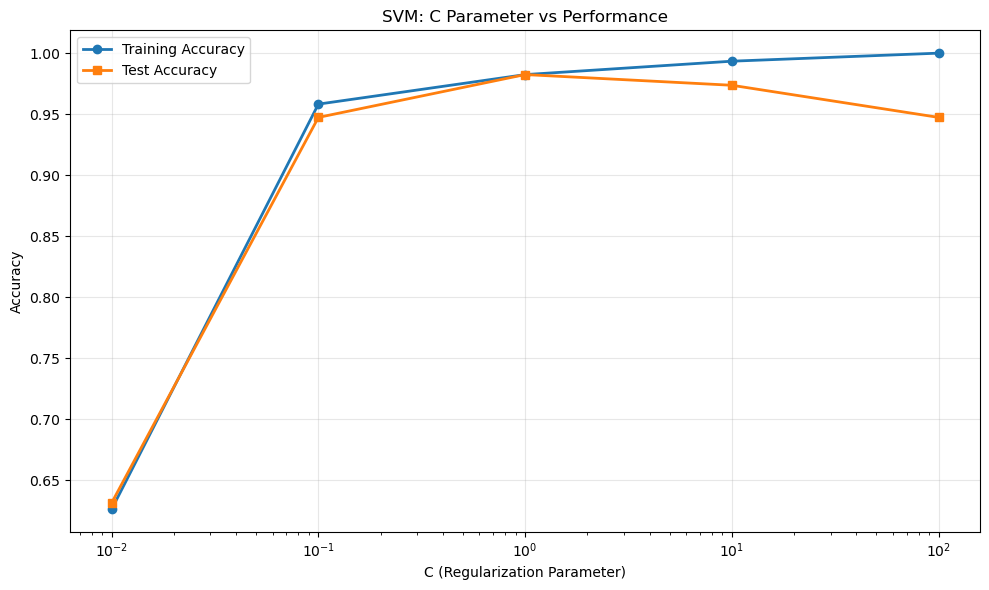

In [12]:
# Plot C parameter effect
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_scores_c, 'o-', label='Training Accuracy', linewidth=2)
plt.semilogx(C_values, test_scores_c, 's-', label='Test Accuracy', linewidth=2)
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('SVM: C Parameter vs Performance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('svm_c_parameter.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'svm_c_parameter.png'")
plt.show()

In [13]:
# 6. Hyperparameter Tuning - Gamma Parameter
print("\n" + "=" * 60)
print("6. Hyperparameter Tuning - Gamma Parameter")
print("ضبط المعاملات - معامل Gamma")
print("=" * 60)
print("\n📊 Testing gamma parameter on RBF kernel (30 features)")
print("   Gamma controls kernel influence: higher gamma = more complex boundaries")

gamma_values = [0.001, 0.01, 0.1, 1, 10]
train_scores_gamma = []
test_scores_gamma = []

for gamma in gamma_values:
    svm_temp = SVC(kernel='rbf', C=1.0, gamma=gamma, probability=True, random_state=42)
    svm_temp.fit(X_train_full_scaled, y_train)
    train_scores_gamma.append(accuracy_score(y_train, svm_temp.predict(X_train_full_scaled)))
    test_scores_gamma.append(accuracy_score(y_test, svm_temp.predict(X_test_full_scaled)))
    
print(f"\n✅ Gamma parameter tuning complete!")
print(f"   Best test accuracy: {max(test_scores_gamma):.4f} at gamma = {gamma_values[np.argmax(test_scores_gamma)]}")



6. Hyperparameter Tuning - Gamma Parameter
ضبط المعاملات - معامل Gamma

📊 Testing gamma parameter on RBF kernel (30 features)
   Gamma controls kernel influence: higher gamma = more complex boundaries

✅ Gamma parameter tuning complete!
   Best test accuracy: 0.9825 at gamma = 0.01



✓ Plot saved as 'svm_gamma_parameter.png'


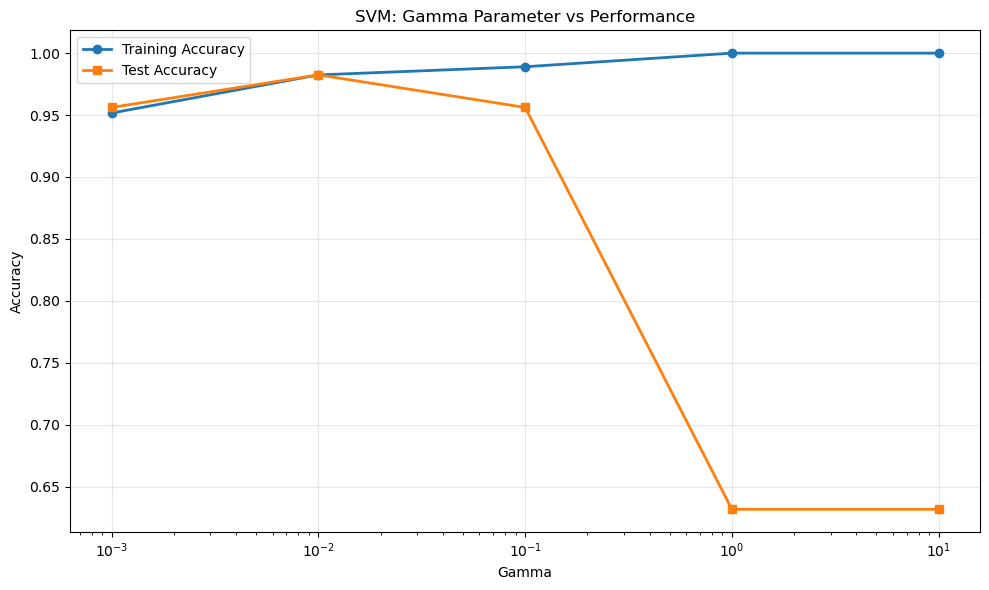

In [14]:
# Plot gamma parameter effect
plt.figure(figsize=(10, 6))
plt.semilogx(gamma_values, train_scores_gamma, 'o-', label='Training Accuracy', linewidth=2)
plt.semilogx(gamma_values, test_scores_gamma, 's-', label='Test Accuracy', linewidth=2)
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('SVM: Gamma Parameter vs Performance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('svm_gamma_parameter.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'svm_gamma_parameter.png'")
plt.show()


7. Decision Boundaries Visualization (2D for visualization)
تصور حدود القرار (2D للتصور)

⚠️  Note: Training separate 2D models for visualization only!
   Real models above use 30 features (better performance)
   These 2D models show decision boundary shapes in 2D space




✓ Plot saved as 'svm_decision_boundaries.png'
⚠️  Remember: These are 2D visualizations. Real models use all 30 features!


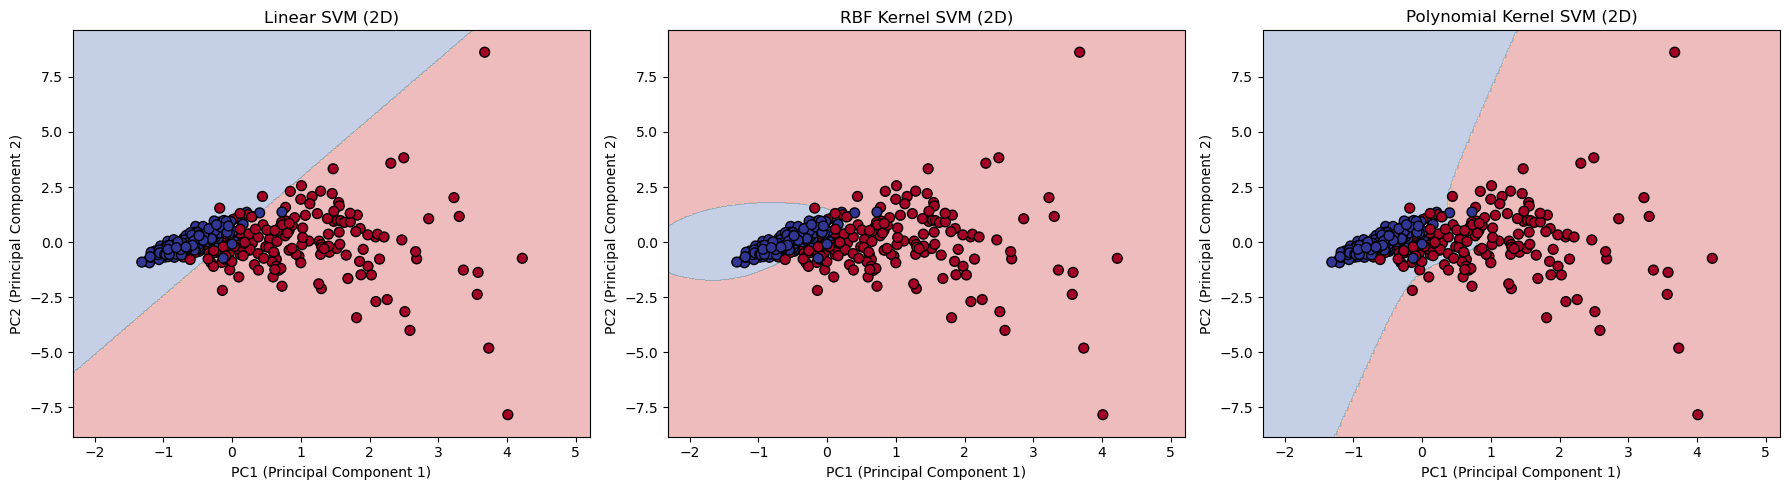

In [15]:
# 7. Decision Boundaries Visualization
print("\n" + "=" * 60)
print("7. Decision Boundaries Visualization (2D for visualization)")
print("تصور حدود القرار (2D للتصور)")
print("=" * 60)
print("\n⚠️  Note: Training separate 2D models for visualization only!")
print("   Real models above use 30 features (better performance)")
print("   These 2D models show decision boundary shapes in 2D space\n")

# Train models on 2D data for visualization
svm_linear_2d = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
svm_linear_2d.fit(X_train_2d_scaled, y_train)

svm_rbf_2d = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)
svm_rbf_2d.fit(X_train_2d_scaled, y_train)

svm_poly_2d = SVC(kernel='poly', degree=3, C=1.0, probability=True, random_state=42)
svm_poly_2d.fit(X_train_2d_scaled, y_train)

def plot_decision_boundary(X, y, model, title, ax):
    """Plot decision boundary for 2D data"""
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu',
                        edgecolors='black', s=50)
    ax.set_xlabel('PC1 (Principal Component 1)')
    ax.set_ylabel('PC2 (Principal Component 2)')
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Use 2D models trained on PCA-reduced data for visualization
models_for_plot = [
    (svm_linear_2d, 'Linear SVM (2D)', X_train_2d_scaled),
    (svm_rbf_2d, 'RBF Kernel SVM (2D)', X_train_2d_scaled),
    (svm_poly_2d, 'Polynomial Kernel SVM (2D)', X_train_2d_scaled)
]

for idx, (model, title, X_plot) in enumerate(models_for_plot):
    plot_decision_boundary(X_plot, y_train, model, title, axes[idx])

plt.tight_layout()
plt.savefig('svm_decision_boundaries.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'svm_decision_boundaries.png'")
print("⚠️  Remember: These are 2D visualizations. Real models use all 30 features!")
plt.show()


In [16]:
# 8. Support Vectors Analysis
print("\n" + "=" * 60)
print("8. Support Vectors Analysis")
print("تحليل ناقلات الدعم")
print("=" * 60)
print("\n📊 Support vectors from models trained on 30 features:")
print(f"   Linear SVM: {len(svm_linear.support_vectors_)} support vectors")
print(f"   RBF Kernel: {len(svm_rbf.support_vectors_)} support vectors")
print(f"   Polynomial: {len(svm_poly.support_vectors_)} support vectors")

print(f"\n💡 Interpretation:")
print(f"   - Support vectors are the critical data points that define the decision boundary")
print(f"   - Fewer support vectors = simpler model (more efficient)")
print(f"   - RBF often uses fewer support vectors than linear for complex boundaries")



8. Support Vectors Analysis
تحليل ناقلات الدعم

📊 Support vectors from models trained on 30 features:
   Linear SVM: 32 support vectors
   RBF Kernel: 97 support vectors
   Polynomial: 145 support vectors

💡 Interpretation:
   - Support vectors are the critical data points that define the decision boundary
   - Fewer support vectors = simpler model (more efficient)
   - RBF often uses fewer support vectors than linear for complex boundaries



✓ Plot saved as 'support_vectors.png'


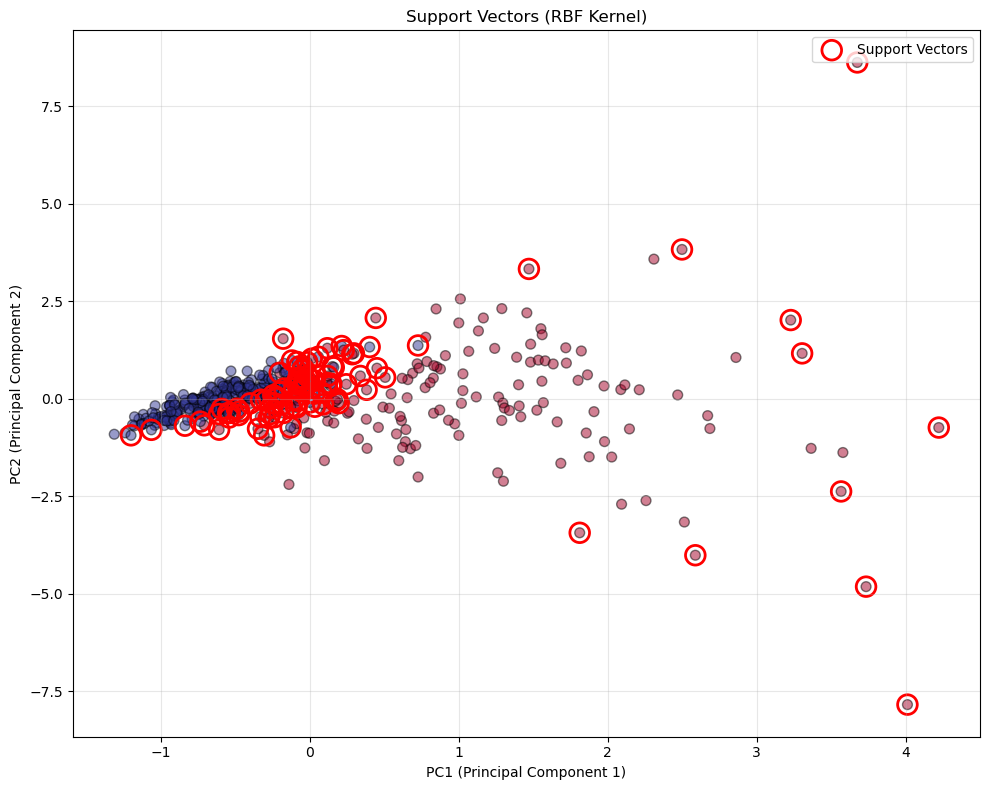

In [17]:
# Visualize support vectors
plt.figure(figsize=(10, 8))
plt.scatter(X_train_2d_scaled[:, 0], X_train_2d_scaled[:, 1],
           c=y_train, cmap='RdYlBu', alpha=0.5, s=50, edgecolors='black')
plt.scatter(svm_rbf_2d.support_vectors_[:, 0], svm_rbf_2d.support_vectors_[:, 1],
           facecolors='none', edgecolors='red', s=200, linewidths=2,
           label='Support Vectors')
plt.xlabel('PC1 (Principal Component 1)')
plt.ylabel('PC2 (Principal Component 2)')
plt.title('Support Vectors (RBF Kernel)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('support_vectors.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'support_vectors.png'")
plt.show()

In [18]:
# 9. ROC Curves Comparison
print("\n" + "=" * 60)
print("9. ROC Curves Comparison")
print("مقارنة منحنيات ROC")
print("=" * 60)



9. ROC Curves Comparison
مقارنة منحنيات ROC


In [19]:
# Calculate ROC curves (using models trained on 30 features)
print("\n📊 Calculating ROC curves from models trained on 30 features:")

y_test_proba_linear = svm_linear.predict_proba(X_test_full_scaled)[:, 1]
y_test_proba_poly = svm_poly.predict_proba(X_test_full_scaled)[:, 1]
# y_test_proba_rbf already calculated above

fpr_linear, tpr_linear, _ = roc_curve(y_test, y_test_proba_linear)
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_test_proba_rbf)
fpr_poly, tpr_poly, _ = roc_curve(y_test, y_test_proba_poly)

auc_linear = roc_auc_score(y_test, y_test_proba_linear)
auc_rbf = roc_auc_score(y_test, y_test_proba_rbf)
auc_poly = roc_auc_score(y_test, y_test_proba_poly)
print(f"\nAUC Scores:")
print(f"Linear: {auc_linear:.4f}")
print(f"RBF: {auc_rbf:.4f}")
print(f"Polynomial: {auc_poly:.4f}")

# Add interpretation
print("\n" + "=" * 60)
print("💡 Interpreting AUC Scores | تفسير درجات AUC")
print("=" * 60)

auc_scores = {
    'Linear': auc_linear,
    'RBF': auc_rbf,
    'Polynomial': auc_poly
}

best_auc_kernel = max(auc_scores, key=auc_scores.get)
best_auc = auc_scores[best_auc_kernel]

print(f"\n📊 Best AUC: {best_auc_kernel} ({best_auc:.4f})")
print(f"   - This kernel has the best ability to distinguish classes")

print(f"\n🔍 AUC Quality Assessment:")
for kernel, score in auc_scores.items():
    if score >= 0.9:
        quality = "✅ EXCELLENT"
    elif score >= 0.8:
        quality = "✅ GOOD"
    elif score >= 0.7:
        quality = "⚠️  FAIR"
    elif score >= 0.5:
        quality = "⚠️  POOR"
    else:
        quality = "❌ VERY POOR"
    print(f"   - {kernel}: {score:.4f} ({quality})")

if auc_rbf >= 0.99:
    print(f"\n✅ Excellent AUC Performance:")
    print(f"   - RBF has excellent AUC ({auc_rbf:.4f})")
    print(f"   - This indicates:")
    print(f"     • Very good class separation on this dataset")
    print(f"     • Real medical data with 30 features can achieve high performance")
    print(f"     • Proper feature scaling and kernel selection are working well")

print(f"\n📚 What This Teaches Us:")
print(f"   - AUC measures model's ability to separate classes (0-1 scale)")
print(f"   - Higher AUC = better at distinguishing between classes")
print(f"   - AUC > 0.9 is excellent, >0.8 is good, >0.7 is fair")
print(f"   - Perfect AUC (1.0) is suspicious - check for overfitting")
print(f"   - Compare AUC with accuracy to get full picture")
print(f"   - RBF kernel often has best AUC for non-linear data")


📊 Calculating ROC curves from models trained on 30 features:

AUC Scores:
Linear: 0.9964
RBF: 0.9950
Polynomial: 0.9954

💡 Interpreting AUC Scores | تفسير درجات AUC

📊 Best AUC: Linear (0.9964)
   - This kernel has the best ability to distinguish classes

🔍 AUC Quality Assessment:
   - Linear: 0.9964 (✅ EXCELLENT)
   - RBF: 0.9950 (✅ EXCELLENT)
   - Polynomial: 0.9954 (✅ EXCELLENT)

✅ Excellent AUC Performance:
   - RBF has excellent AUC (0.9950)
   - This indicates:
     • Very good class separation on this dataset
     • Real medical data with 30 features can achieve high performance
     • Proper feature scaling and kernel selection are working well

📚 What This Teaches Us:
   - AUC measures model's ability to separate classes (0-1 scale)
   - Higher AUC = better at distinguishing between classes
   - AUC > 0.9 is excellent, >0.8 is good, >0.7 is fair
   - Perfect AUC (1.0) is suspicious - check for overfitting
   - Compare AUC with accuracy to get full picture
   - RBF kernel ofte

## Step 8: Decision Framework - Kernel Selection for SVM | الخطوة 8: إطار القرار - اختيار النواة لـ SVM

**BEFORE**: You've learned how to use different SVM kernels, but when should you use each one?

**AFTER**: You'll have a clear decision framework to choose the right kernel for any classification problem!

**Why this matters**: Using the wrong kernel can:
- **Poor performance** → Wrong kernel can't capture the patterns
- **Overfitting** → Complex kernels may overfit on small data
- **Wasted computation** → Using expensive kernels when simple ones work

---

### 🎯 Decision Framework: Which Kernel to Use? | إطار القرار: أي نواة تستخدم؟

**Key Question**: Should I use **LINEAR**, **RBF**, **POLYNOMIAL**, or another kernel?

#### Decision Tree:

```
What type of problem do you have?
├─ REGRESSION → Use SVR (Support Vector Regression) with appropriate kernel
│   └─ Why? SVM for regression uses same kernels
│
└─ CLASSIFICATION → Check data characteristics:
    ├─ Linear decision boundary? → Use LINEAR kernel ✅
    │   └─ Why? Simple, fast, interpretable
    │
    ├─ Non-linear, smooth curves? → Use RBF kernel ✅
    │   └─ Why? Handles smooth non-linear patterns well
    │
    ├─ Non-linear, polynomial patterns? → Use POLYNOMIAL kernel ⚠️
    │   └─ Why? Can capture polynomial relationships
    │
    └─ Unknown pattern? → Start with RBF kernel ✅
        └─ Why? Most versatile, good default
```

#### Detailed Decision Process:

```
Step 1: Visualize the data
├─ Plot scatter plot or decision boundary
│
└─ What pattern do you see?
    ├─ Straight line separation → LINEAR kernel
    ├─ Smooth curves → RBF kernel
    ├─ Polynomial patterns → POLYNOMIAL kernel
    └─ Unknown → Try RBF first (most versatile)

Step 2: Try Linear kernel first
├─ Build SVM with linear kernel
├─ Check performance
│
└─ Is performance good enough?
    ├─ YES (accuracy > 0.85) → Use LINEAR kernel ✅
    └─ NO (accuracy < 0.85) → Try RBF kernel

Step 3: Try RBF kernel
├─ Build SVM with RBF kernel
├─ Tune C and gamma
├─ Check performance
│
└─ Is performance good enough?
    ├─ YES → Use RBF kernel ✅
    └─ NO → Try Polynomial kernel or other methods
```

---

### 📊 Comparison Table: SVM Kernels | جدول المقارنة

| Kernel | When to Use | Pros | Cons | Example |
|--------|-------------|------|------|---------|
| **Linear** | Linear boundaries, large datasets, fast | • Fast<br>• Interpretable<br>• Less overfitting<br>• Good for large data | • Can't handle non-linear<br>• Limited to linear patterns | Linearly separable data, text classification |
| **RBF (Radial Basis Function)** | Non-linear, smooth curves, default choice | • Handles non-linear<br>• Versatile<br>• Smooth boundaries<br>• Good default | • Requires tuning (C, gamma)<br>• Slower than linear<br>• Can overfit | Most non-linear problems, default choice |
| **Polynomial** | Polynomial patterns, specific relationships | • Handles polynomial patterns<br>• Flexible degree | • More hyperparameters<br>• Can overfit<br>• Slower | Polynomial relationships, specific patterns |
| **Sigmoid** | Neural network-like, rarely used | • Similar to neural networks | • Rarely better than RBF<br>• Less common | Special cases, rarely used |

---

### ✅ When to Use Each Kernel | متى تستخدم كل نواة

#### Use Linear Kernel when:
1. **Linear Decision Boundary** ✅
   - Data is linearly separable
   - Straight line can separate classes
   - **Example**: Text classification, linearly separable data

2. **Large Dataset** ✅
   - More than 10,000 samples
   - Linear is faster
   - **Example**: Large-scale text classification

3. **Interpretability Needed** ✅
   - Need to understand decision boundary
   - Linear is more interpretable
   - **Example**: Medical diagnosis with linear patterns

4. **Fast Training Needed** ✅
   - Need quick results
   - Linear is fastest
   - **Example**: Real-time classification

#### Use RBF Kernel when:
1. **Non-Linear Patterns** ✅
   - Data has curves, non-linear boundaries
   - Linear kernel fails
   - **Example**: Most real-world classification problems

2. **Unknown Pattern** ✅
   - Don't know the pattern type
   - RBF is good default
   - **Example**: First attempt at new problem

3. **Smooth Boundaries** ✅
   - Need smooth, curved decision boundaries
   - RBF creates smooth curves
   - **Example**: Image classification, complex patterns

4. **Small to Medium Dataset** ✅
   - Less than 10,000 samples
   - RBF works well
   - **Example**: Most classification problems

#### Use Polynomial Kernel when:
1. **Polynomial Relationships** ✅
   - Data has polynomial patterns (x², x³ relationships)
   - RBF may not capture well
   - **Example**: Specific polynomial patterns

2. **Specific Domain Knowledge** ✅
   - Know the relationship is polynomial
   - **Example**: Physics-based problems

---

### ❌ When NOT to Use Each Kernel | متى لا تستخدم كل نواة

#### Don't use Linear Kernel when:
1. **Non-Linear Patterns** ❌
   - Data has curves, complex boundaries
   - **Use Instead**: RBF or Polynomial kernel

2. **Poor Performance** ❌
   - Linear accuracy < 0.80
   - **Use Instead**: RBF kernel

#### Don't use RBF Kernel when:
1. **Very Large Dataset** ❌
   - More than 100,000 samples
   - RBF is slow
   - **Use Instead**: Linear kernel or other methods

2. **Linear Patterns** ❌
   - Data is linearly separable
   - **Use Instead**: Linear kernel (simpler, faster)

#### Don't use Polynomial Kernel when:
1. **Unknown Patterns** ❌
   - Don't know if polynomial
   - **Use Instead**: RBF kernel (more versatile)

2. **Small Dataset** ❌
   - Less than 100 samples
   - Polynomial may overfit
   - **Use Instead**: RBF or Linear kernel

---

### 📊 Real-World Examples | أمثلة من العالم الحقيقي

#### Example 1: Text Classification ✅ LINEAR KERNEL
- **Problem**: Classify documents (spam/not spam)
- **Pattern**: Linear (word frequencies linearly related)
- **Dataset**: Large (50,000 documents)
- **Decision**: ✅ Use Linear Kernel
- **Reasoning**: Linear patterns, large dataset, fast training needed

#### Example 2: Image Classification ✅ RBF KERNEL
- **Problem**: Classify images (cat/dog)
- **Pattern**: Non-linear (complex pixel patterns)
- **Dataset**: Medium (5,000 images)
- **Decision**: ✅ Use RBF Kernel
- **Reasoning**: Non-linear patterns, smooth boundaries needed, medium dataset

#### Example 3: Customer Segmentation ✅ RBF KERNEL
- **Problem**: Segment customers (high/medium/low value)
- **Pattern**: Unknown, likely non-linear
- **Dataset**: Medium (2,000 customers)
- **Decision**: ✅ Use RBF Kernel (start here)
- **Reasoning**: Unknown pattern, RBF is good default, can tune C and gamma

#### Example 4: Medical Diagnosis (Linear) ✅ LINEAR KERNEL
- **Problem**: Diagnose disease from symptoms
- **Pattern**: Linear (symptoms linearly related to disease)
- **Dataset**: Small (500 patients)
- **Decision**: ✅ Use Linear Kernel
- **Reasoning**: Linear patterns, interpretability important, small dataset

---

### ✅ Key Takeaways | النقاط الرئيسية

1. **Start with Linear** - Always try linear kernel first (simplest)
2. **Non-linear → RBF** - Use RBF for non-linear patterns (most versatile)
3. **RBF is default** - Good default choice when pattern is unknown
4. **Tune C and gamma** - Critical hyperparameters for RBF
5. **Large data → Linear** - Linear is faster for large datasets
6. **Visualize boundaries** - Plot decision boundaries to see pattern
7. **Compare kernels** - Try multiple kernels, pick the best

---

### 🎓 Practice Decision-Making | ممارسة اتخاذ القرار

**Scenario 1**: Classifying emails as spam (50,000 emails)
- **Pattern**: Linear (word frequencies)
- **Dataset**: Large (50,000)
- **Decision**: ✅ Linear Kernel (linear patterns, large dataset, fast)

**Scenario 2**: Classifying images (cat/dog, 3,000 images)
- **Pattern**: Non-linear (complex pixel patterns)
- **Dataset**: Medium (3,000)
- **Decision**: ✅ RBF Kernel (non-linear patterns, smooth boundaries)

**Scenario 3**: Customer churn prediction (unknown pattern, 1,000 customers)
- **Pattern**: Unknown
- **Dataset**: Medium (1,000)
- **Decision**: ✅ RBF Kernel (unknown pattern, good default, can tune)

---

**Connection to Next Steps**: 
- 📓 **Unit 5, Example 1: Grid Search** - For tuning C and gamma hyperparameters
- 📓 **Unit 3, Example 2: Decision Trees** - Alternative for non-linear patterns
- 📓 **Unit 5, Example 2: Boosting** - For best performance on complex problems



✓ Plot saved as 'svm_roc_curves.png'


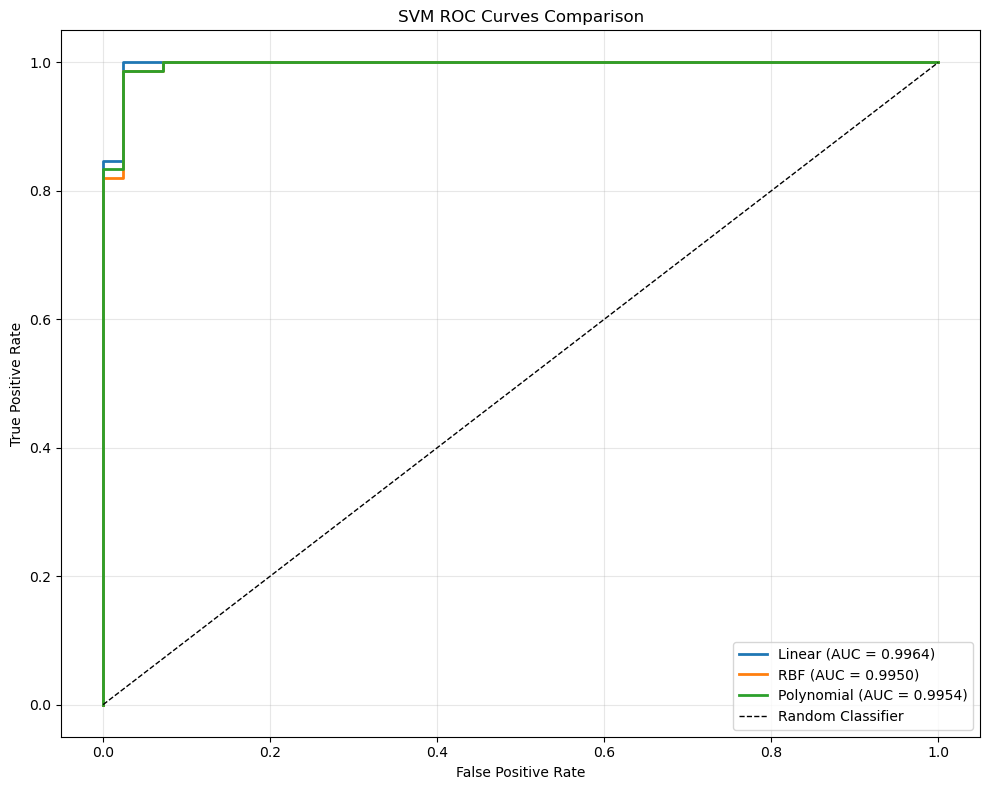


Example 3 Complete! ✓
اكتمل المثال 3! ✓


In [20]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_linear, tpr_linear, linewidth=2, label=f'Linear (AUC = {auc_linear:.4f})')
plt.plot(fpr_rbf, tpr_rbf, linewidth=2, label=f'RBF (AUC = {auc_rbf:.4f})')
plt.plot(fpr_poly, tpr_poly, linewidth=2, label=f'Polynomial (AUC = {auc_poly:.4f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curves Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('svm_roc_curves.png', dpi=300, bbox_inches='tight')
print("\n✓ Plot saved as 'svm_roc_curves.png'")
plt.show()
print("\n" + "=" * 60)
print("Example 3 Complete! ✓")
print("اكتمل المثال 3! ✓")
print("=" * 60)
